In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/thoi_trang.csv")

In [3]:
df.shape

(9764, 17)

In [4]:
df.head(10)

,Unnamed: 0,Product Name,Price,Brand,Categories,Product Sold,Stock,Rating,5 Start,4 Start,3 Start,2 Start,1 Start,Total Rating,No of Comments,Image and Video,Parent Category
0,0,Porozi Áo sweater dệt kim tay dài cổ tròn thời...,139000.0,porozi,Thời Trang Nữ/Áo len & Cardigan,931,142230,4.7,290,10,15,4,11,330,166,143,Thời Trang Nữ
1,1,FREESHIP- Áo len cổ tròn màu xanh đính cúc pho...,152000.0,porozi,Thời Trang Nữ/Áo len & Cardigan,241,17,4.9,56,5,0,0,0,61,45,39,Thời Trang Nữ
2,2,Áo len cho bố nam trung niên loại 1 đẹp dày dặ...,100000.0,porozi,"Thời Trang Nam/Áo Hoodie, Áo Len & Áo Nỉ/Áo Len",176,280,4.6,37,4,4,0,2,47,25,11,Thời Trang Nam
3,3,"Áo Len Nam Cổ Tròn Trơn SUKIYA Nhiều Màu, Đủ S...",164250.0,SUKIYA JAPAN,"Thời Trang Nam/Áo Hoodie, Áo Len & Áo Nỉ/Áo Len",7800,83902,4.9,2300,102,41,10,22,2500,1300,1000,Thời Trang Nam
4,4,Áo khoác cardigan len lửng tay dài nhiều màu,215000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,556,11,4.9,135,7,3,0,2,147,86,75,Thời Trang Nữ
5,5,Áo len oversize form dáng rộng dệt kim dài tay...,165000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,716,0,4.9,223,11,8,0,0,242,177,154,Thời Trang Nữ
6,6,ÁO KHOÁC CARDIGAN LEN NỮ QUẢNG CHÂU HỌA TIẾT H...,169000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,21900,142230,4.9,3800,113,47,16,41,4100,1600,1400,Thời Trang Nữ
7,7,[SẴN HÀNG] Áo len Noel giáng sinh cực nhiều mẫ...,259000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,410,421,4.8,68,7,3,1,0,79,51,32,Thời Trang Nữ
8,8,"Áo len lông thỏ cao cấp siêu mềm mịn , ao len ...",230000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo/Khác,140,690,5.0,39,2,0,0,0,41,24,20,Thời Trang Nữ
9,9,Áo len nữ màu trắng đen nâu phom xinh thời tra...,205000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,402,157,4.9,111,4,1,0,0,116,77,56,Thời Trang Nữ


In [5]:
df["Parent Category"].unique()

array(['Thời Trang Nữ', 'Thời Trang Nam', 'Thời Trang Trẻ Em',
       'Túi Ví Nữ', 'Balo & Túi Ví Nam', 'Phụ Kiện & Trang Sức Nữ',
       'Giày Dép Nam', 'Thể Thao & Du Lịch', 'Sắc Đẹp', 'Đồ Chơi',
       'Giày Dép Nữ', 'Nhà Sách Online', 'Đồng Hồ', 'Thiết Bị Điện Tử'],
      dtype=object)

<h3>Get necessary columns only</h3>

In [6]:
except_list = ["Thể Thao & Du Lịch", "Đồ Chơi", "Nhà Sách Online", "Thiết Bị Điện Tử"]

In [7]:
for exc in except_list:
    df = df.loc[df["Parent Category"] != exc]

<h3>Price</h3>

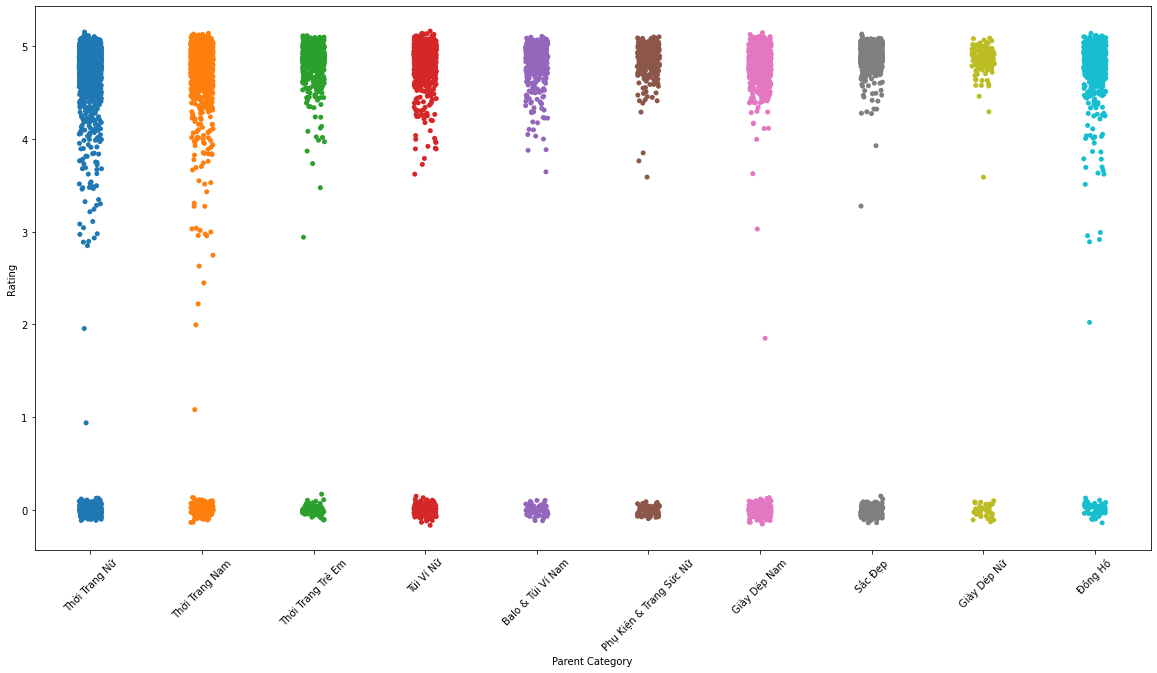

In [8]:
plt.figure(figsize=(20, 10))
df["Rating"] = df["Rating"].apply(lambda x: x + np.random.normal(0, 0.05))  # add jitter in y-axis
chart = sns.stripplot(data=df, x="Parent Category", y="Rating", hue="Parent Category", legend=None)
plt.xticks(rotation=45)
plt.show()
chart.figure.savefig("../figures/Rating.jpeg")

<h3>Product sold</h3>

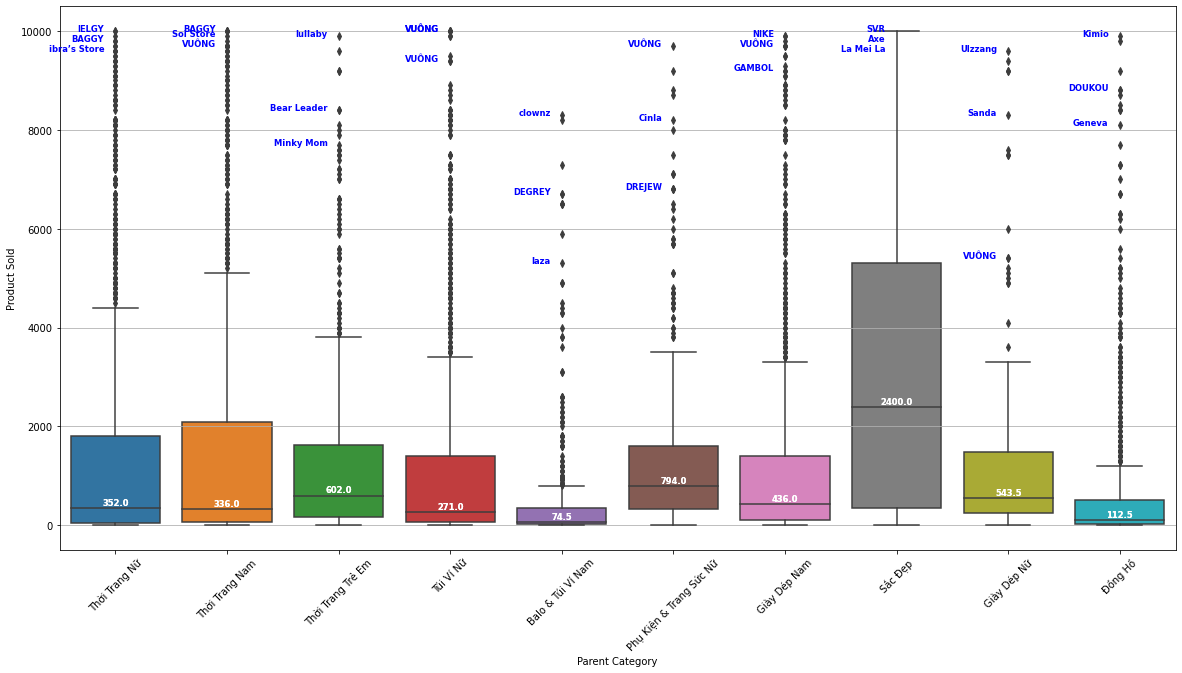

In [9]:
plt.figure(figsize=(20, 10))
ylim = 10000
min_offset = 100

df = df.loc[df["Product Sold"] <= ylim]  # remove outliner
chart = sns.boxplot(data=df, x="Parent Category", y="Product Sold")
medians = df.groupby(["Parent Category"], sort=False)["Product Sold"].median()
offset = (medians * 0.1).mean()

for xtick in chart.get_xticks():
    chart.text(xtick, medians[xtick] + offset, medians[xtick], 
                  horizontalalignment='center',size='small',color='w',weight='semibold')

x_labels = df["Parent Category"].unique()

topk = df.sort_values(["Parent Category", "Product Sold"], ascending=False).groupby("Parent Category").head(10)
for xtick in chart.get_xticks():
    chart.text(xtick, medians[xtick] + offset, medians[xtick], 
               horizontalalignment='center',size='small',color='w',weight='semibold')
    cat_df = topk.loc[topk["Parent Category"] == x_labels[xtick]].reset_index(drop=True)
    for i, row in cat_df.iterrows():
        if i not in [0, 4, 9]:
            continue
        chart.text(xtick - 0.1, row["Product Sold"], row["Brand"],
                   horizontalalignment='right',size='small',color='b',weight='semibold')

plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()
chart.figure.savefig("../figures/ProductSold.jpeg")

<h3>Price</h3>

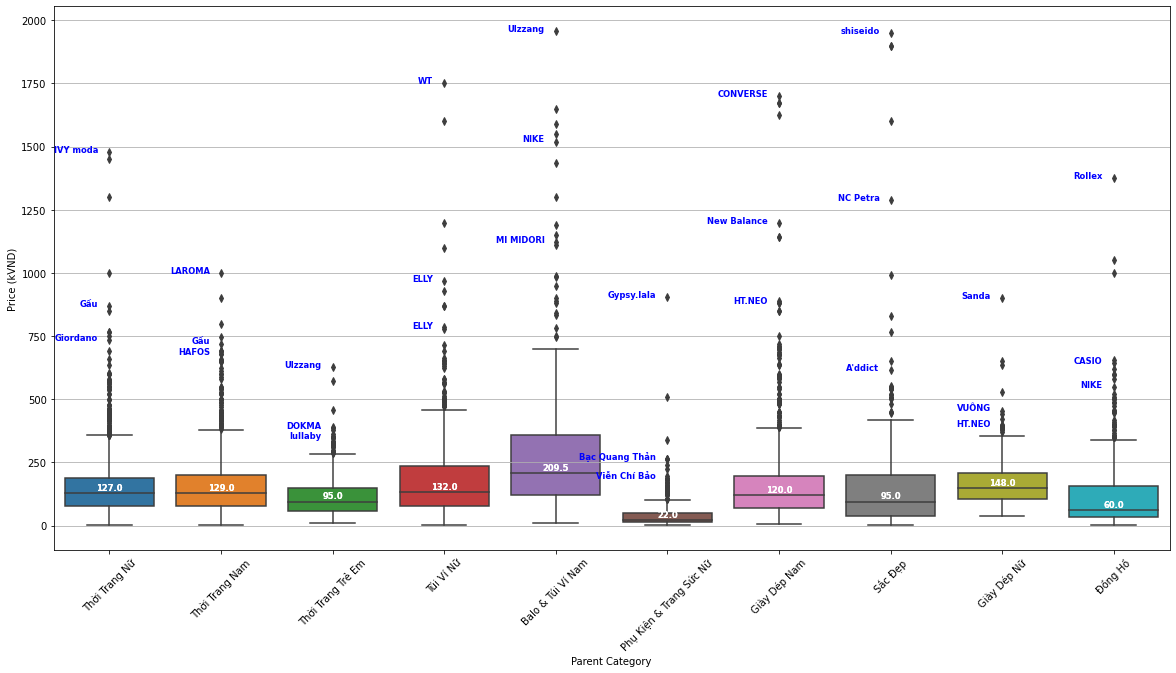

In [10]:
plt.figure(figsize=(20, 10))
df["Price"] = df["Price"] / 1e3  # unit k-vnd
df = df.loc[df["Price"] <= 2e3]  # <= 2mil vnd only
chart = sns.boxplot(data=df, x="Parent Category", y="Price")
medians = df.groupby(["Parent Category"], sort=False)["Price"].median()
offset = (medians * 0.1).mean()

for xtick in chart.get_xticks():
    chart.text(xtick, medians[xtick] + offset, medians[xtick], 
                  horizontalalignment='center',size='small',color='w',weight='semibold')

x_labels = df["Parent Category"].unique()
topk = df.sort_values(["Parent Category", "Price"], ascending=False).groupby("Parent Category").head(10)
for xtick in chart.get_xticks():
    chart.text(xtick, medians[xtick] + offset, medians[xtick], 
               horizontalalignment='center',size='small',color='w',weight='semibold')
    cat_df = topk.loc[topk["Parent Category"] == x_labels[xtick]].reset_index(drop=True)
    for i, row in cat_df.iterrows():
        if i not in [0, 4, 9]:
            continue
        chart.text(xtick - 0.1, row["Price"], row["Brand"],
                   horizontalalignment='right',size='small',color='b',weight='semibold')

chart.set(ylabel="Price (kVND)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()
chart.figure.savefig("../figures/Price.jpeg")